# CLUSTERING

Кластеризация данных из подсайта Виабу / Аниме. Кластеризация проводится на датасете, который предварительно подготовлен с помощью ноутбука DTF_Weeaboo_data_preparation.

In [13]:
import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from pywaffle import Waffle
import seaborn as sns

import math
import itertools

%matplotlib inline
plt.rcParams["figure.figsize"] = [14, 10]

%config Completer.use_jedi = False

sns.set_theme()

print("Imports Done!")

Imports Done!


In [2]:
PATH = "/home/aleksey/PycharmProjects/DTF_database_and_scrapper_config/"

In [3]:
df = pd.read_pickle(PATH + 'Full_analysis/Prepared_weaboo_data_25_04.pkl')
df.head()

,date,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,...,videos,links,audio,total_mediacontent,hashtags,hour,month,weekday,is_weekend,period
0,2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1990,True,36,Офтоп,...,3,0,0,45,[#long],21,3,Monday,0,2018-03
1,2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,664,True,56,Алексей Фёдоров,...,0,0,0,17,[#anime],20,1,Sunday,1,2020-01
2,2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,23,749,True,49,Алексей Фёдоров,...,0,0,0,32,"[#anime, #evangelion]",19,2,Tuesday,0,2020-02
3,2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,238,True,41,Алексей Фёдоров,...,0,1,0,20,[#anime],18,2,Saturday,1,2020-02
4,2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,...,0,0,0,17,[],10,3,Monday,0,2020-03


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7417 entries, 0 to 7416
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 7417 non-null   datetime64[ns]
 1   id                   7417 non-null   int64         
 2   url                  7417 non-null   object        
 3   author               7417 non-null   object        
 4   comments_count       7417 non-null   int64         
 5   favorites_count      7417 non-null   int64         
 6   hits_count           7417 non-null   int64         
 7   is_repost            7417 non-null   bool          
 8   likes                7417 non-null   int64         
 9   subsite              7417 non-null   object        
 10  title                3868 non-null   object        
 11  blocks               7417 non-null   object        
 12  repost               892 non-null    object        
 13  media_content_types  7417 non-nul

In [5]:
from sklearn.cluster import DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram

Для кластеризации используется иерархическая кластеризация, поскольку в ходе экспериментов выяснилось, что на собранных данных нормально работает только она.

# HIERARCHIAL CLUSTERING

In [6]:
X = np.array([df.symbols, df.total_mediacontent]).T
print(X)

X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[13588    45]
 [  223    17]
 [   92    32]
 ...
 [    0     1]
 [    0     5]
 [   46     4]]
[[ 4.38018242  3.35899514]
 [-0.06584797  1.00290981]
 [-0.10942671  2.26509838]
 ...
 [-0.14003164 -0.34342466]
 [-0.14003164 -0.00684104]
 [-0.12472918 -0.09098694]]


In [7]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [8]:
distance_mat = pdist(X_scaled) 
Z = hierarchy.linkage(distance_mat, 'ward') # linkage — реализация агломеративного алгоритма

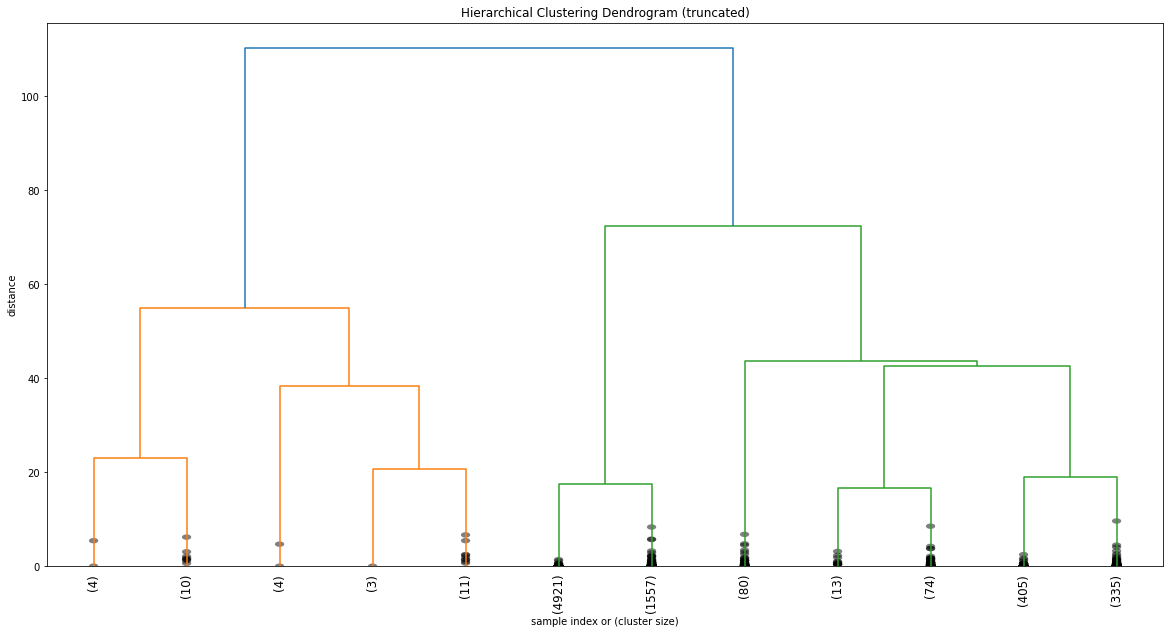

In [9]:
plt.figure(figsize=(20, 10))
# выводим размеры кластеров

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,   # to get a distribution impression in truncated branches
)
plt.show()

In [10]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Дендрограмма иерархической кластеризации (усечённая)')
        plt.xlabel('Индекс элемента выборки или (размер кластера)')
        plt.ylabel('Метрика расстояния алгоритма')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

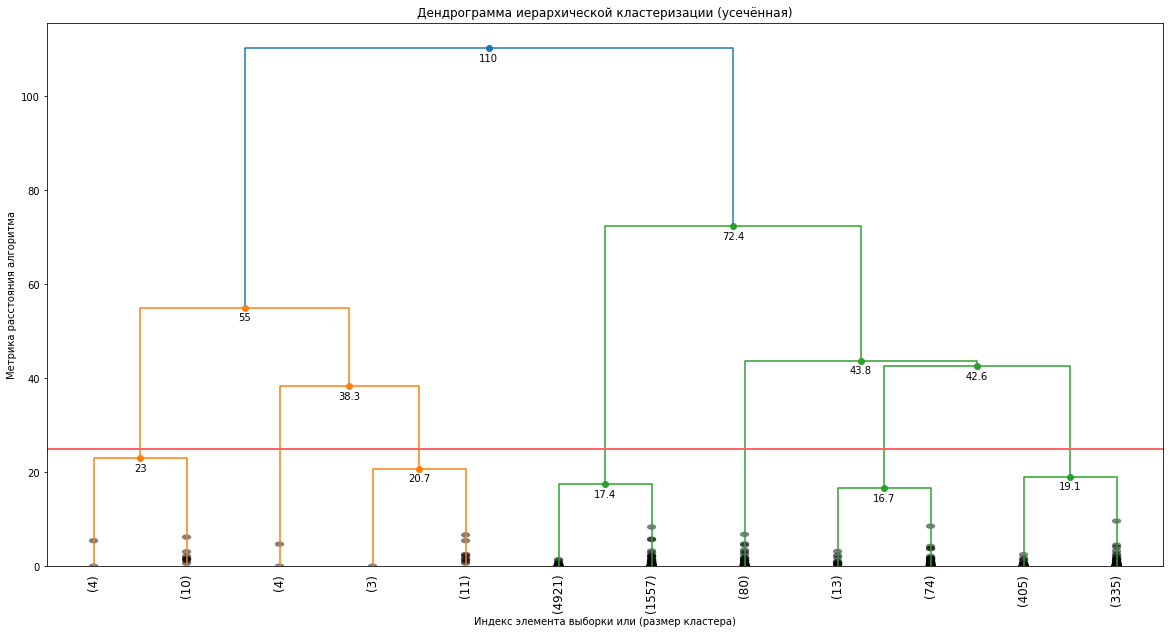

In [11]:
plt.figure(figsize=(20, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)

plt.axhline(25, color='#ff6666', linestyle='-', linewidth=2)

# plt.savefig(PATH + "Full_analysis/clustering_tree.jpg", dpi=300, bbox_inches='tight')

plt.show()

## Наконец-то адекватный результат!

[1 2 3 4 5 6 7]


Text(0, 0.5, 'Количество медиаконтента в публикациях')

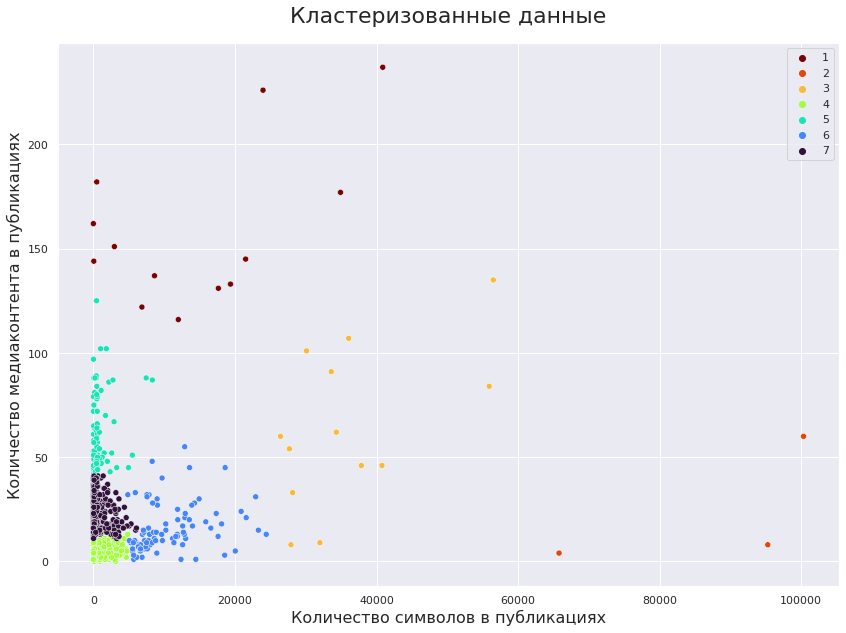

In [36]:
# Зная расстояние
from scipy.cluster.hierarchy import fcluster
# max_d = 25 # Шикарный результат!
max_d = 25
clusters = fcluster(Z, max_d, criterion='distance')
print(np.unique(clusters))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=clusters, palette='turbo_r', legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество символов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)

# plt.savefig(PATH + "Full_analysis/clustered_data.jpg", dpi=300, bbox_inches='tight')

- Мем
- заметка
- мини_подборка
- статья
- подборка
- супер_подборка
- лонгрид
- супер_лонгрид

https://scikit-learn.org/stable/modules/mixture.html

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.inconsistent.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

https://scikit-learn.org/stable/modules/preprocessing.html



https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

https://stackoverflow.com/questions/36296101/donut-chart-python

https://seaborn.pydata.org/tutorial/relational.html

In [17]:
df.head()

,date,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,...,videos,links,audio,total_mediacontent,hashtags,hour,month,weekday,is_weekend,period
0,2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1990,True,36,Офтоп,...,3,0,0,45,[#long],21,3,Monday,0,2018-03
1,2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,664,True,56,Алексей Фёдоров,...,0,0,0,17,[#anime],20,1,Sunday,1,2020-01
2,2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,23,749,True,49,Алексей Фёдоров,...,0,0,0,32,"[#anime, #evangelion]",19,2,Tuesday,0,2020-02
3,2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,238,True,41,Алексей Фёдоров,...,0,1,0,20,[#anime],18,2,Saturday,1,2020-02
4,2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,...,0,0,0,17,[],10,3,Monday,0,2020-03


In [18]:
clusters

array([6, 7, 7, ..., 4, 4, 4], dtype=int32)

In [19]:
df = df.assign(type_of_post=pd.Series(clusters).values)
df.head()

,date,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,...,links,audio,total_mediacontent,hashtags,hour,month,weekday,is_weekend,period,type_of_post
0,2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1990,True,36,Офтоп,...,0,0,45,[#long],21,3,Monday,0,2018-03,6
1,2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,664,True,56,Алексей Фёдоров,...,0,0,17,[#anime],20,1,Sunday,1,2020-01,7
2,2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,23,749,True,49,Алексей Фёдоров,...,0,0,32,"[#anime, #evangelion]",19,2,Tuesday,0,2020-02,7
3,2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,238,True,41,Алексей Фёдоров,...,1,0,20,[#anime],18,2,Saturday,1,2020-02,7
4,2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,...,0,0,17,[],10,3,Monday,0,2020-03,7


In [21]:
# print(np.unique(clusters))
# print(df.type_of_post.unique())
# print(clusters == df.type_of_post)

In [ ]:
# Alternative
max_d = 22
clusters = fcluster(Z, max_d, criterion='distance')

# sns.scatterplot(x=X[:,0], y=X[:,1], hue=df.type_of_post, 
#                 style=df.is_repost, palette='turbo_r', s=50, legend='full')

sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
plt.figure(figsize=(20, 10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=40,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)
# plt.savefig(PATH + "Full_analysis/deeper_clustering_tree.jpg", dpi=300, bbox_inches='tight')
plt.show()

https://stackoverflow.com/questions/28988627/pandas-correlation-groupby

# Попытка настроить алгоритм на количестве слов, а не на символов

In [22]:
X_alter = np.array([df.words, df.total_mediacontent]).T
print(X_alter)

X_alter_scaled = StandardScaler().fit_transform(X_alter)
print(X_alter_scaled)

[[2012   45]
 [  29   17]
 [  12   32]
 ...
 [   0    1]
 [   0    5]
 [   7    4]]
[[ 4.4631386   3.35899514]
 [-0.06300824  1.00290981]
 [-0.1018103   2.26509838]
 ...
 [-0.12919999 -0.34342466]
 [-0.12919999 -0.00684104]
 [-0.11322267 -0.09098694]]


In [23]:
distance_mat_alter = pdist(X_alter_scaled) 
Z_alter = hierarchy.linkage(distance_mat_alter, 'ward') 

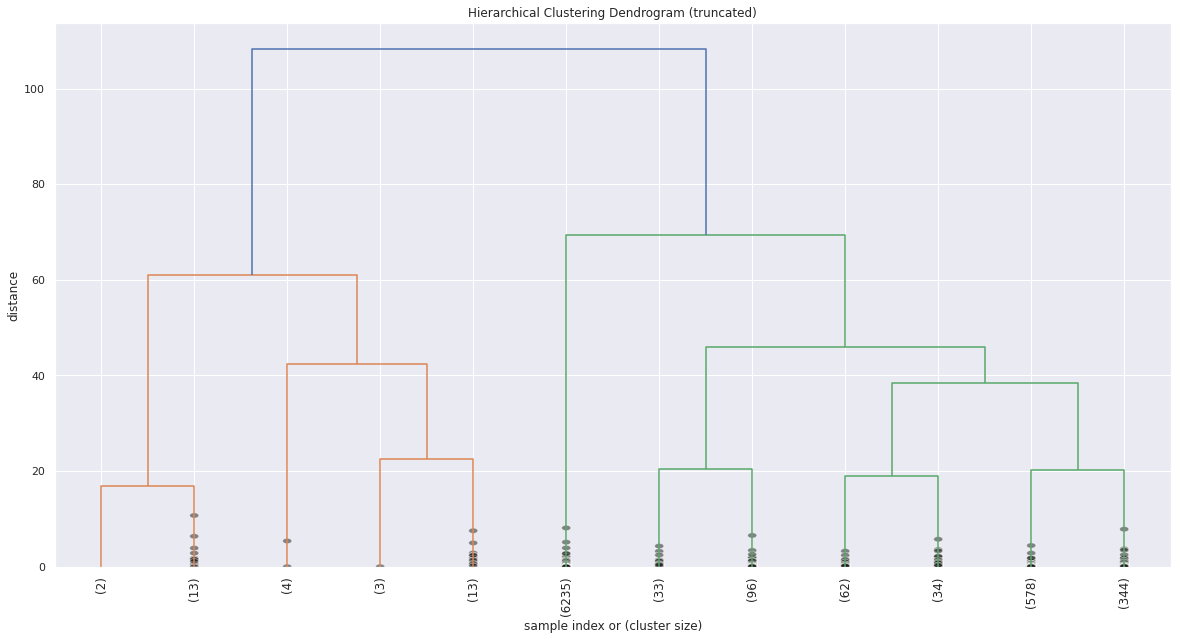

In [24]:
plt.figure(figsize=(20, 10))
# выводим размеры кластеров

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z_alter,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,                   # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,   # to get a distribution impression in truncated branches
)
plt.show()

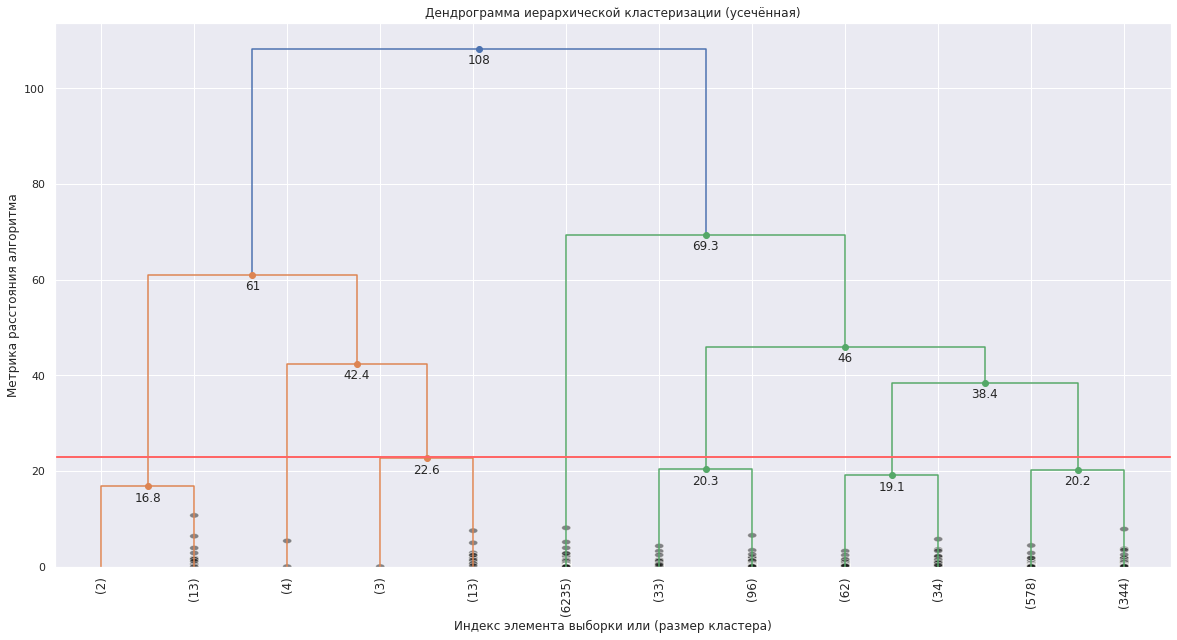

In [53]:
plt.figure(figsize=(20, 10))
fancy_dendrogram(
    Z_alter,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,  # useful in small plots so annotations don't overlap
)

plt.axhline(23, color='#ff6666', linestyle='-', linewidth=2)

# plt.savefig(PATH + "Full_analysis/clustering_tree.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [54]:
plt.rcParams["figure.figsize"] = [14, 10]

[1 2 3 4 5 6 7]


Text(0, 0.5, 'Количество медиаконтента в публикациях')

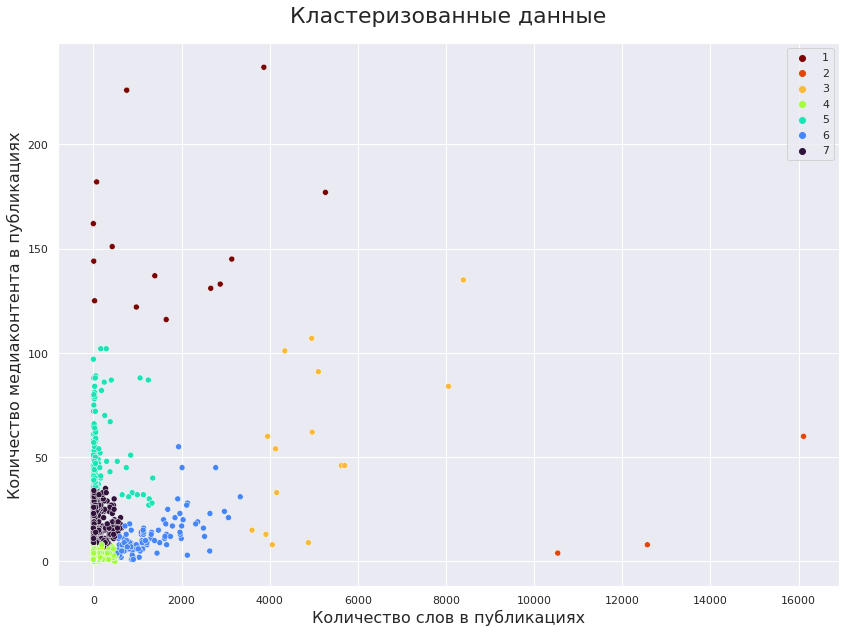

In [55]:
# Зная расстояние
max_d = 23
clusters = fcluster(Z_alter, max_d, criterion='distance')
print(np.unique(clusters))
sns.scatterplot(x=X_alter[:,0], y=X_alter[:,1], hue=clusters, palette='turbo_r', legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество слов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)

# plt.savefig(PATH + "Full_analysis/clustered_data.jpg", dpi=300, bbox_inches='tight')

ДО 25.04.2021

- Заметка
- Статья
- Лонгрид
- Супер_лонгрид_1
- Супер_лонгрид_2
- Ультра_лонгрид
- Подборка
- Супер_подборка
- Супер_медиа_лонгрид

ПОСЛЕ 25.04.2021

- Заметка
- Статья
- Лонгрид
- Супер_лонгрид
- Ультра_лонгрид
- Подборка
- Супер_медиа_лонгрид

In [47]:
df.head()

,date,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,...,links,audio,total_mediacontent,hashtags,hour,month,weekday,is_weekend,period,type_of_post
0,2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1990,True,36,Офтоп,...,0,0,45,[#long],21,3,Monday,0,2018-03,6
1,2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,664,True,56,Алексей Фёдоров,...,0,0,17,[#anime],20,1,Sunday,1,2020-01,7
2,2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,23,749,True,49,Алексей Фёдоров,...,0,0,32,"[#anime, #evangelion]",19,2,Tuesday,0,2020-02,7
3,2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,238,True,41,Алексей Фёдоров,...,1,0,20,[#anime],18,2,Saturday,1,2020-02,7
4,2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,...,0,0,17,[],10,3,Monday,0,2020-03,7


In [48]:
clusters

array([6, 7, 7, ..., 4, 4, 4], dtype=int32)

In [49]:
df = df.assign(type_of_post=pd.Series(clusters).values)

In [50]:
df.head()

,date,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,...,links,audio,total_mediacontent,hashtags,hour,month,weekday,is_weekend,period,type_of_post
0,2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1990,True,36,Офтоп,...,0,0,45,[#long],21,3,Monday,0,2018-03,6
1,2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,664,True,56,Алексей Фёдоров,...,0,0,17,[#anime],20,1,Sunday,1,2020-01,7
2,2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,23,749,True,49,Алексей Фёдоров,...,0,0,32,"[#anime, #evangelion]",19,2,Tuesday,0,2020-02,7
3,2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,238,True,41,Алексей Фёдоров,...,1,0,20,[#anime],18,2,Saturday,1,2020-02,7
4,2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,...,0,0,17,[],10,3,Monday,0,2020-03,6


<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

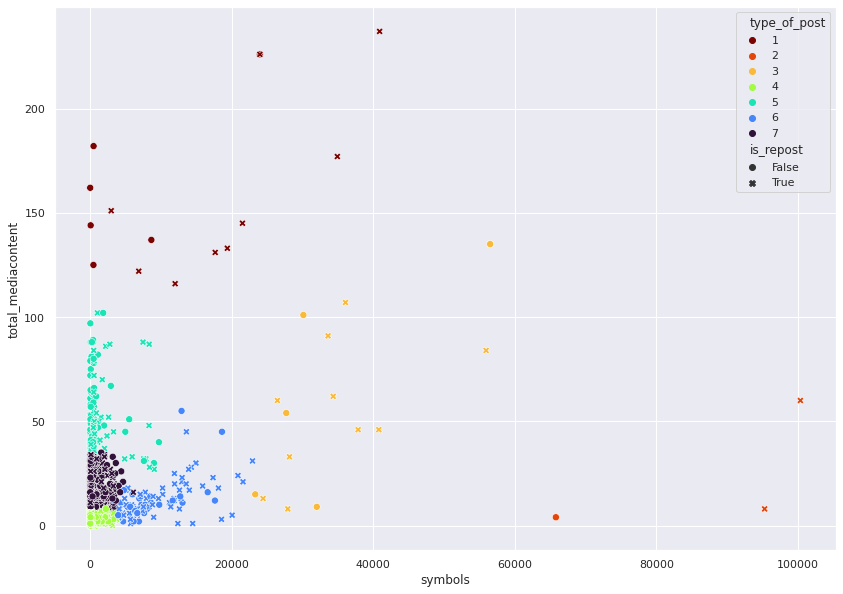

In [51]:
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

<AxesSubplot:xlabel='words', ylabel='total_mediacontent'>

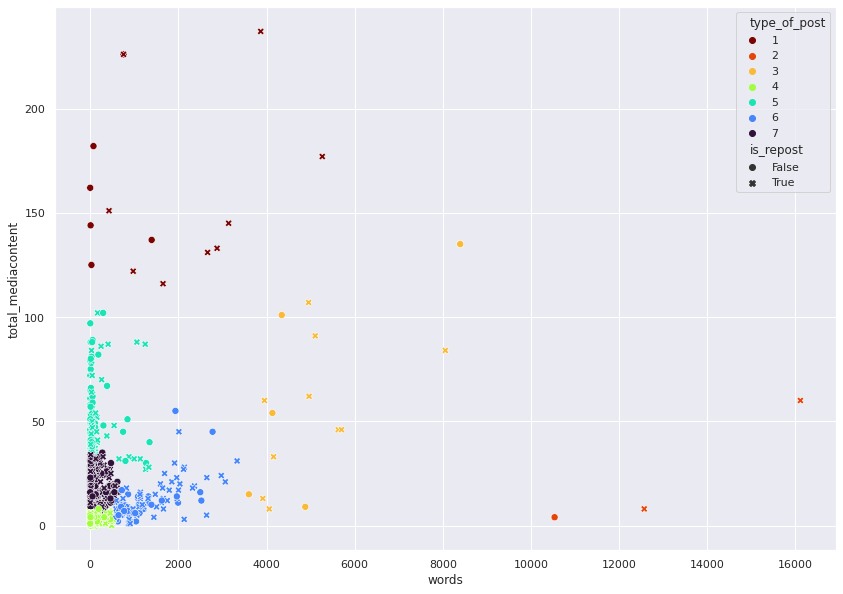

In [52]:
sns.scatterplot(x=df.words, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

# Попытки выделить мемы

In [56]:
df.head()

,date,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,...,links,audio,total_mediacontent,hashtags,hour,month,weekday,is_weekend,period,type_of_post
0,2018-03-12 21:59:15,17110,https://dtf.ru/flood/17110-ne-odin-lish-tip-luny,"{'id': 4876, 'url': 'https://dtf.ru/u/4876-geo...",19,32,1990,True,36,Офтоп,...,0,0,45,[#long],21,3,Monday,0,2018-03,6
1,2020-01-26 20:38:21,97215,https://dtf.ru/u/92907-aleksey-fedorov/97215-t...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",11,47,664,True,56,Алексей Фёдоров,...,0,0,17,[#anime],20,1,Sunday,1,2020-01,7
2,2020-02-18 19:11:46,104163,https://dtf.ru/u/92907-aleksey-fedorov/104163-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",39,23,749,True,49,Алексей Фёдоров,...,0,0,32,"[#anime, #evangelion]",19,2,Tuesday,0,2020-02,7
3,2020-02-29 18:25:10,108055,https://dtf.ru/u/92907-aleksey-fedorov/108055-...,"{'id': 92907, 'url': 'https://dtf.ru/u/92907-a...",7,18,238,True,41,Алексей Фёдоров,...,1,0,20,[#anime],18,2,Saturday,1,2020-02,7
4,2020-03-16 10:36:03,113363,https://dtf.ru/u/4810-oleg-kubaneishvili/11336...,"{'id': 4810, 'url': 'https://dtf.ru/u/4810-ole...",5,8,180,True,15,Олег Кубанеишвили,...,0,0,17,[],10,3,Monday,0,2020-03,6


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7417 entries, 0 to 7416
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 7417 non-null   datetime64[ns]
 1   id                   7417 non-null   int64         
 2   url                  7417 non-null   object        
 3   author               7417 non-null   object        
 4   comments_count       7417 non-null   int64         
 5   favorites_count      7417 non-null   int64         
 6   hits_count           7417 non-null   int64         
 7   is_repost            7417 non-null   bool          
 8   likes                7417 non-null   int64         
 9   subsite              7417 non-null   object        
 10  title                3868 non-null   object        
 11  blocks               7417 non-null   object        
 12  repost               892 non-null    object        
 13  media_content_types  7417 non-nul

In [58]:
tmp = df.groupby(['type_of_post']).agg({'id': 'count'})
tmp

,id
type_of_post,
1,15
2,4
3,16
4,6235
5,129
6,96
7,922


In [59]:
tmp_2 = df[(df.type_of_post == 4) & (df.total_mediacontent == 1) & (df.symbols < 30)]
tmp_2.shape

(3345, 31)

(0.0, 50.0)

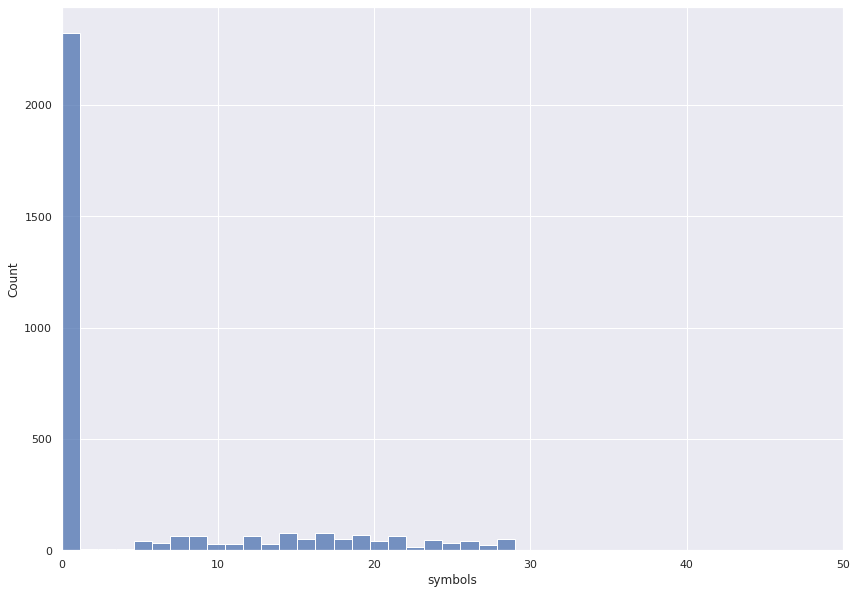

In [60]:
sns.histplot(tmp_2.symbols)
plt.xlim(0, 50)

In [61]:
tmp = df[(df.type_of_post == 4)]

/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

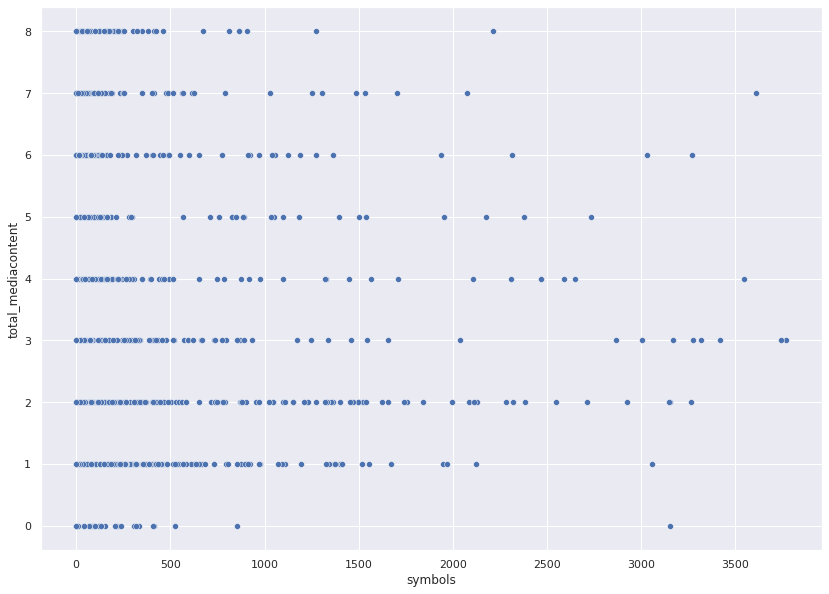

In [62]:
sns.scatterplot(tmp.symbols, tmp.total_mediacontent)

In [63]:
df.type_of_post.unique()

array([6, 7, 4, 1, 5, 2, 3], dtype=int32)

In [64]:
len(df.type_of_post.unique())

7

In [ ]:
# plt.figure(figsize=[16,14])
# sns.scatterplot(x=np.log(df.symbols + 1), y=np.log(df.total_mediacontent +1), hue=df.type_of_post, 
#                 style=df.is_repost, palette='turbo_r', s=50, legend='full')

<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

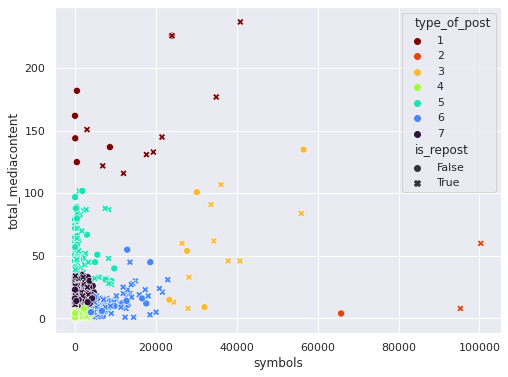

In [65]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [66]:
df_copy = df.copy()

In [ ]:
# OLD
# df_copy.replace({'type_of_post': {1: "Ультра-Медиа-Логрид", 2: "Ультра-Логрид", 3: "Супер-Лонгрид-1", 
#                                   4: "Супер-Лонгрид-2", 5: "Статья", 6: "Заметка", 
#                                   7: "Ультра-Подборка", 8: "Лонгрид", 9: "Подборка"}}, inplace=True)

In [67]:
df_copy.replace({'type_of_post': {1: "Ультра-Медиа-Логрид", 2: "Ультра-Логрид", 3: "Супер-Лонгрид", 
                                  4: "Заметка", 5: "Подборка", 6: "Лонгрид", 7: "Статья"}}, inplace=True)

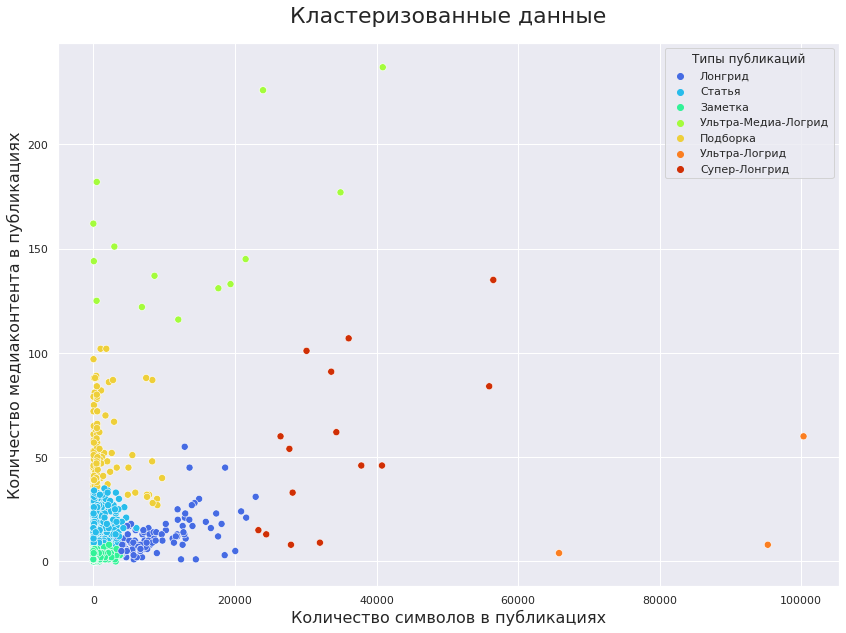

In [68]:
plt.figure(figsize=[14, 10])
sns.scatterplot(x=df_copy.symbols, y=df_copy.total_mediacontent, hue=df_copy.type_of_post, 
                palette='turbo', s=50, legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество символов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)
plt.legend(title='Типы публикаций')

# plt.savefig(PATH + "Full_analysis/clustered_labeled_data.jpg", dpi=300, bbox_inches='tight')

In [69]:
df_copy.loc[df_copy[(df_copy.type_of_post == 'Заметка') & (df_copy.total_mediacontent == 1) & 
                    (df_copy.symbols < 100)].index, 'type_of_post'] = 'Мем'
# df_copy.loc[df_copy[(df_copy.type_of_post == "Супер-Лонгрид-1")].index, 'type_of_post'] = "Супер-Лонгрид-2"

In [ ]:
# df_copy.replace({'type_of_post': {"Супер-Лонгрид-2": "Супер-Лонгрид"}}, inplace=True)

In [70]:
len(df_copy.type_of_post.unique())

8

In [71]:
df_copy.type_of_post.unique()

array(['Лонгрид', 'Статья', 'Заметка', 'Мем', 'Ультра-Медиа-Логрид',
       'Подборка', 'Ультра-Логрид', 'Супер-Лонгрид'], dtype=object)

<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

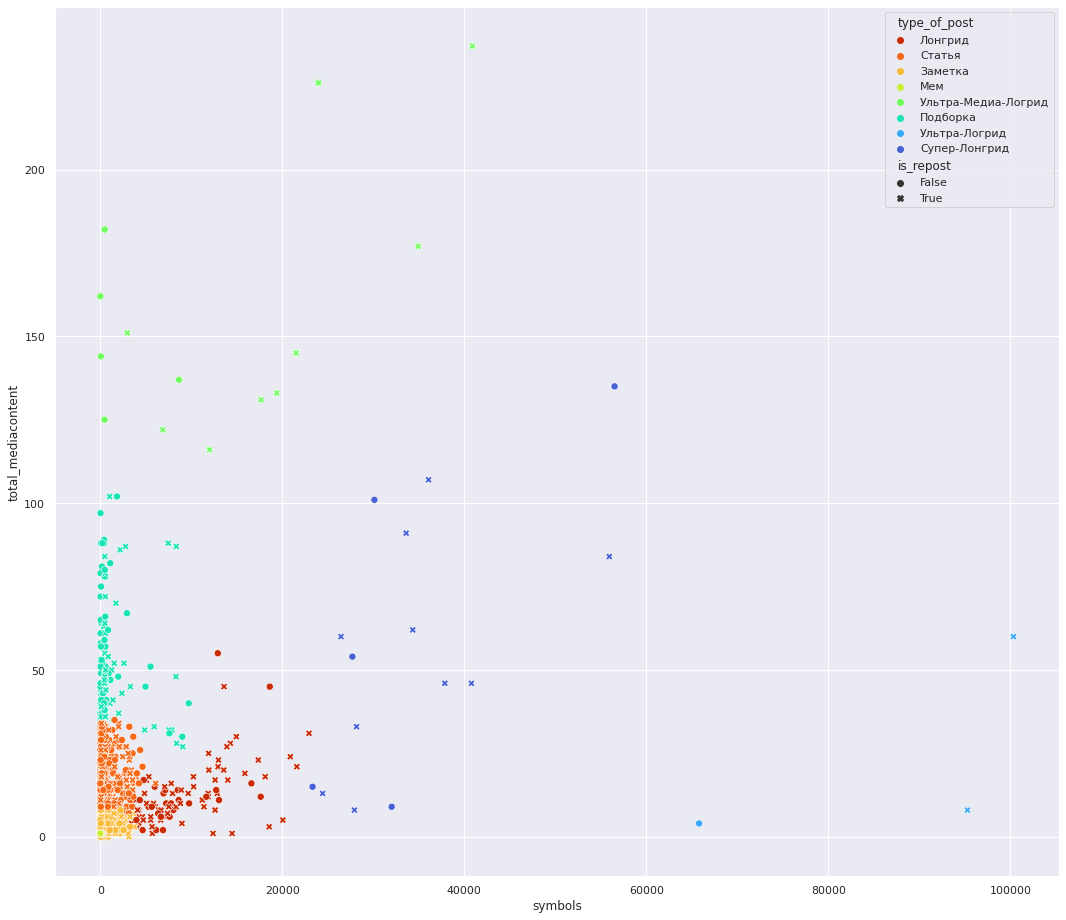

In [72]:
plt.figure(figsize=[18,16])
sns.scatterplot(x=df_copy.symbols, y=df_copy.total_mediacontent, hue=df_copy.type_of_post, 
                style=df_copy.is_repost, palette='turbo_r', s=50, legend='full')

<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

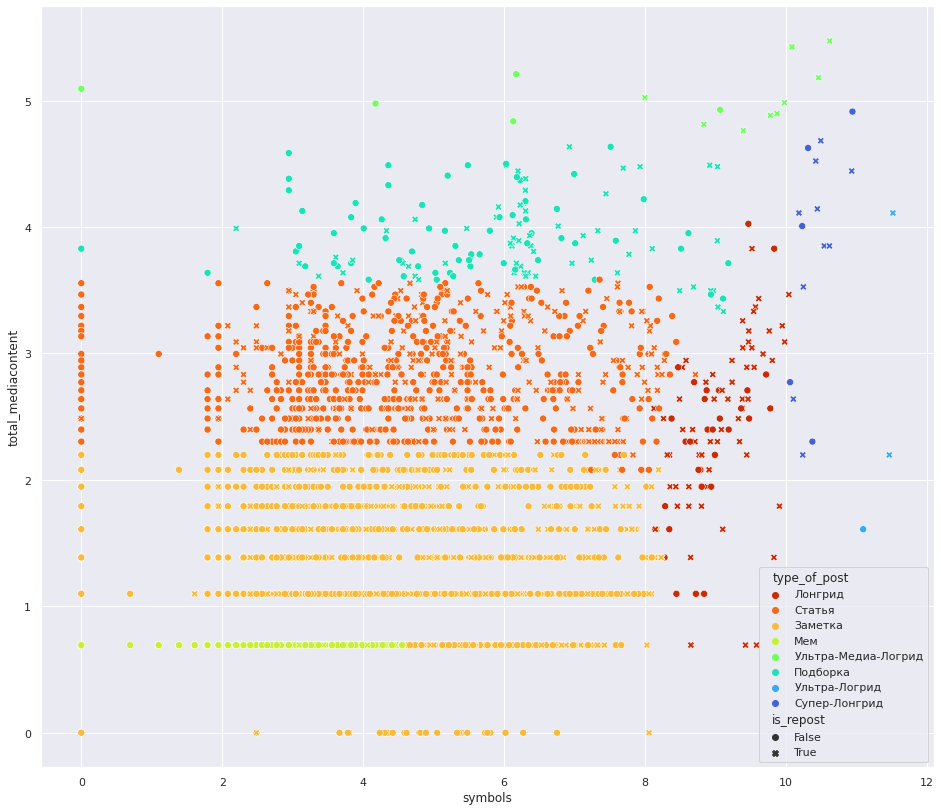

In [73]:
plt.figure(figsize=[16,14])
sns.scatterplot(x=np.log(df_copy.symbols + 1), y=np.log(df_copy.total_mediacontent +1), hue=df_copy.type_of_post, 
                style=df_copy.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
# plt.figure(figsize=[14, 10])
# sns.scatterplot(x=df_copy.symbols, y=df_copy.total_mediacontent, hue=df_copy.type_of_post, 
#                 palette='magma_r', s=25, legend='full')

# plt.title('Кластеризованные данные', fontsize=22, pad=20)
# plt.xlabel('Количество символов в публикациях', fontsize=16)
# plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)
# plt.legend(title='Типы публикаций')

In [74]:
df_copy.type_of_post.unique()

array(['Лонгрид', 'Статья', 'Заметка', 'Мем', 'Ультра-Медиа-Логрид',
       'Подборка', 'Ультра-Логрид', 'Супер-Лонгрид'], dtype=object)

In [75]:
df_copy[df_copy.type_of_post == 'Мем']

,date,id,url,author,comments_count,favorites_count,hits_count,is_repost,likes,subsite,...,links,audio,total_mediacontent,hashtags,hour,month,weekday,is_weekend,period,type_of_post
9,2020-07-14 20:57:17,170958,https://dtf.ru/s/weaboo/170958,"{'id': 197370, 'url': 'https://dtf.ru/u/197370...",8,1,117,False,19,Виабу,...,0,0,1,[],20,7,Tuesday,0,2020-07,Мем
10,2020-07-14 21:34:11,170996,https://dtf.ru/s/weaboo/170996-milota,"{'id': 162369, 'url': 'https://dtf.ru/u/162369...",6,1,107,False,18,Виабу,...,0,0,1,[],21,7,Tuesday,0,2020-07,Мем
11,2020-07-14 21:43:51,171001,https://dtf.ru/s/weaboo/171001-satdog,"{'id': 127404, 'url': 'https://dtf.ru/u/127404...",1,1,130,False,20,Виабу,...,0,0,1,[],21,7,Tuesday,0,2020-07,Мем
12,2020-07-14 22:08:34,171026,https://dtf.ru/s/weaboo/171026,"{'id': 69160, 'url': 'https://dtf.ru/u/69160-s...",0,2,30,False,17,Виабу,...,0,0,1,[],22,7,Tuesday,0,2020-07,Мем
13,2020-07-14 22:25:43,171041,https://dtf.ru/s/weaboo/171041-kisyaglyavya-ob...,"{'id': 127404, 'url': 'https://dtf.ru/u/127404...",5,2,202,False,23,Виабу,...,0,0,1,[],22,7,Tuesday,0,2020-07,Мем
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7406,2021-04-25 09:57:15,713736,https://dtf.ru/s/weaboo/713736-some-jphoto,"{'id': 124435, 'url': 'https://dtf.ru/u/124435...",0,4,41,False,25,Виабу,...,0,0,1,"[#somejphoto, #japan]",9,4,Sunday,1,2021-04,Мем
7407,2021-04-25 10:12:51,713744,https://dtf.ru/s/weaboo/713744,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",2,6,217,False,59,Виабу,...,0,0,1,[],10,4,Sunday,1,2021-04,Мем
7409,2021-04-25 10:55:33,713773,https://dtf.ru/s/weaboo/713773,"{'id': 293040, 'url': 'https://dtf.ru/u/293040...",0,3,60,False,57,Виабу,...,0,0,1,[],10,4,Sunday,1,2021-04,Мем
7413,2021-04-25 14:31:38,713922,https://dtf.ru/s/weaboo/713922,"{'id': 212847, 'url': 'https://dtf.ru/u/212847...",5,3,71,False,9,Виабу,...,0,0,1,[],14,4,Sunday,1,2021-04,Мем


(3892, 31)


/home/aleksey/PycharmProjects/Machine_Learning_test_area/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='symbols', ylabel='total_mediacontent'>

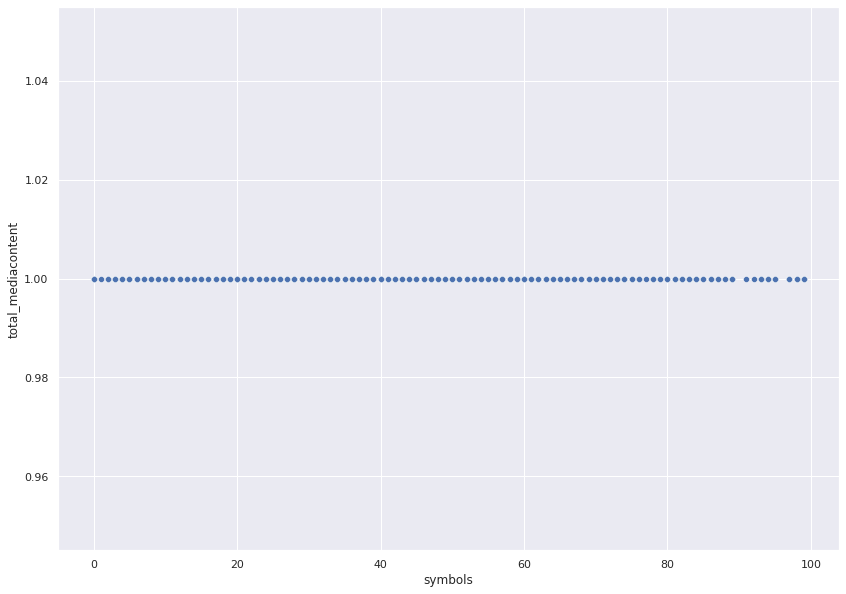

In [76]:
tmp = df_copy[(df_copy.type_of_post == 'Мем')]
print(tmp.shape)
sns.scatterplot(tmp.symbols, tmp.total_mediacontent)

---

---

---

In [77]:
df.type_of_post.unique()

array([6, 7, 4, 1, 5, 2, 3], dtype=int32)

In [ ]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
df.replace({'type_of_post': {1: "Ультра-Медиа-Логрид", 2: "Ультра-Логрид", 3: "Супер-Лонгрид-1", 
                                  4: "Супер-Лонгрид-2", 5: "Статья", 6: "Заметка", 
                                  7: "Ультра-Подборка", 8: "Лонгрид", 9: "Подборка"}}, inplace=True)

In [ ]:
df.type_of_post.unique()

In [ ]:
plt.figure(figsize=[8,6])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

In [ ]:
# ДЛЯ ПОСТРОЕНИЯ НОРМАЛЬНОГО ГРАФИКА ВЫБРАН ПОРОГ ПО СИМВОЛАМ: 100. 
# ЗАМЕНИТЬ НА 30 ПОСЛЕ ПОСТРОЕНИЯ ГРАФИКА

df.loc[df[(df.type_of_post == 'Заметка') & (df.total_mediacontent == 1) & 
                    (df.symbols < 30)].index, 'type_of_post'] = 'Мем'
df.loc[df[(df.type_of_post == "Супер-Лонгрид-1")].index, 'type_of_post'] = "Супер-Лонгрид-2"
df.replace({'type_of_post': {"Супер-Лонгрид-2": "Супер-Лонгрид"}}, inplace=True)

In [ ]:
plt.figure(figsize=[18,16])
sns.scatterplot(x=df.symbols, y=df.total_mediacontent, hue=df.type_of_post, 
                style=df.is_repost, palette='turbo_r', s=50, legend='full')

plt.title('Кластеризованные данные', fontsize=22, pad=20)
plt.xlabel('Количество символов в публикациях', fontsize=16)
plt.ylabel('Количество медиаконтента в публикациях', fontsize=16)
plt.legend(title='Типы публикаций', )

# plt.savefig(PATH + "Full_analysis/clustered_labeled_data_final.jpg", dpi=300, bbox_inches='tight')

In [ ]:
df[df.type_of_post == 'Мем'].shape

In [ ]:
len("Интересно, в этой строке наберётся сто символов или нет?")

In [ ]:
print(df.type_of_post.value_counts())
print('\n')
print(df.type_of_post.value_counts().index)
print('\n')
print(df.type_of_post.value_counts().values)

In [ ]:
tmp = df.type_of_post.value_counts()
tmp

In [ ]:
tmp.values.sum()

In [ ]:
sns.set_palette("viridis_r")

def func(pct, allvals):
    absolute = round(pct/100.*np.sum(allvals))
    return "{:.1f}%\n{:d} medias".format(pct, absolute)

fig=plt.figure(figsize=(14,10))
gs1 = gridspec.GridSpec(1,1,
    left=0.1,right=0.7,
    bottom=0.1,top=0.7,
)
# gs2 = gridspec.GridSpec(1,1,
#     left=0.05,right=0.95,
#     bottom=0.9,top=1.0,
# )

pie_ax=fig.add_subplot(gs1[0])
# title_ax=fig.add_subplot(gs2[0])

# Create a list of colors (from iWantHue)
# colors = ['#66b3ff', '#ffcc99', '#99ff99', '#ff6666']
labels = tmp.index 

# Create a pie chart
wedges = pie_ax.pie(
    tmp.values,
    shadow=False,
#     colors=colors, 
    startangle=45, #frame=True, 
    autopct=lambda pct: func(pct, tmp.values), 
    explode=(0, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"), zorder=0, va="center")

for i, p in enumerate(wedges[0]):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle,
#                              "color":colors[i]
                            "color":'k'
                            })
    pie_ax.annotate(labels[i], xy=(x, y), xytext=(1.25*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)


centre_circle = plt.Circle((0,0), 0.88, color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Количество публикаций различных типов', fontsize=22, pad=26)

plt.axis('equal')

# plt.savefig(PATH + "Full_analysis/medias.jpg", dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
from pywaffle import Waffle

labels = tmp.index
d = {lab: val for lab, val in zip(labels, tmp.values)}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=60, 
    values=list(tmp.values),
#     labels=labels,
    title={
        'label': 'Количество публикаций различных типов',
        'loc': 'center',
        'fontdict': {
            'fontsize': 20
        }
    },
#     labels=[f"{k} ({int(v / sum(d.values()) * 100)}%)" for k, v in d.items()],
    legend={
        'labels': [f"{k} ({v} единиц, {round(v/sum(d.values())*100,2)}%)" for k, v in d.items()],  # labels could also be under legend instead
        'loc': 'lower left',
        'bbox_to_anchor': (0.1, -0.15),
        'ncol': 3,
        'framealpha': 0,
        'fontsize': 12
    },
    figsize=(35, 10),
#     legend={'bbox_to_anchor': (1.3, 0.85)}    
)
# plt.savefig(PATH + "Full_analysis/types_of_posts.jpg", dpi=300, bbox_inches='tight')

In [ ]:
tmp

In [ ]:
(tmp.values[0]) / tmp.values.sum()

In [ ]:
# df.to_csv(PATH + 'Full_analysis/Clustered_weaboo_data_25_04.csv')

In [ ]:
# df.to_pickle(PATH + 'Full_analysis/Clustered_weaboo_data_25_04.pkl')

Альтернативные алгоритмы кластеризации: K-Means, MeanShift

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn import metrics

# inertia = []
# k = range(1, 10)
# for k_i in k:
#     km = KMeans(n_clusters=k_i).fit(X)
#     km.fit(X)
#     inertia.append(km.inertia_)
    
# plt.plot(k, inertia)
# plt.xlabel('k')
# plt.ylabel('inertia')
# plt.title('The Elbow Method showing the optimal k')

In [ ]:
# from sklearn.metrics import silhouette_score
# inertia = []
# k = range(2, 10)
# for k_i in k:
#     km = KMeans(n_clusters=k_i).fit(X)
#     km.fit(X)
#     inertia.append(silhouette_score(X, km.labels_))

# print(inertia)
    
# plt.plot(k, inertia)
# plt.xlabel('k')
# plt.ylabel('silhouette_score')
# plt.title('The Elbow Method showing the optimal k')

In [ ]:
# kmeans = KMeans(n_clusters=4, random_state=10)
# y_pred = kmeans.fit_predict(X)

# # Plot the prediction
# # plt.scatter(X[:,0], X[:,1], c=y_pred)
# sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred)
# # plt.savefig(PATH + "Full_analysis/fail_KMeans.jpg", dpi=300, bbox_inches='tight')

In [ ]:
# from sklearn.cluster import SpectralClustering

# X = np.array([df.symbols, df.total_mediacontent]).T
# X

Очень долго работало и не доработало до конца. Нужно попробовать в колабе.

In [ ]:
# clustering = SpectralClustering(n_clusters=5, assign_labels="discretize", affinity='rbf')
# y_pred = clustering.fit_predict(X)

# plt.rcParams["figure.figsize"] = [20, 16]
# print(np.unique(y_pred))

# sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='turbo')

In [ ]:
# from sklearn import cluster
# from sklearn.cluster import MeanShift

# bandwidth = cluster.estimate_bandwidth(X, quantile=0.2, n_samples=50)
# ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
# y_pred = ms.fit_predict(X)

# plt.rcParams["figure.figsize"] = [20, 16]
# print(np.unique(y_pred))

# labels = ms.labels_
# cluster_centers = ms.cluster_centers_

# labels_unique = np.unique(labels)
# n_clusters_ = len(labels_unique)

# print("number of estimated clusters : %d" % n_clusters_)

# sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='turbo')
# plt.savefig(PATH + "Full_analysis/fail_EM.jpg", dpi=300, bbox_inches='tight')

# # from itertools import cycle
# # colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
# # for k, col in zip(range(n_clusters_), colors):
# #     my_members = labels == k
# #     cluster_center = cluster_centers[k]
# #     plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
# #     plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
# #              markeredgecolor='k', markersize=14)
# # plt.title('Estimated number of clusters: %d' % n_clusters_)
# # plt.show()

Почему нормально не сошлись алгоритмы кластеризации? 
#### Потому что я сделал чушь. Основные метрики использованных алгоритмов - плотность и расстояние. Учитывая, что я не нормализировал и не стандартизировал входные данные - алгоритмы просто не могли нормально сойтись. 

Слишком высокая дисперсия по абсциссе, по отношению к дисперсию по ординате. 
#### НОРМАЛИЗАЦИЯ НУЖНА ОБЯЗАТЕЛЬНО!

Для DBSCAN важны параметры эпсилон и н_сэмплс - т. е. эпсилон-окрестность точки и количество точек, входящих в эту окрестность, которые необходимы для определения их принадлежности к одному кластеру. 